In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import KMeans
from pyod.models.abod import ABOD
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

Z-score outliers: 5


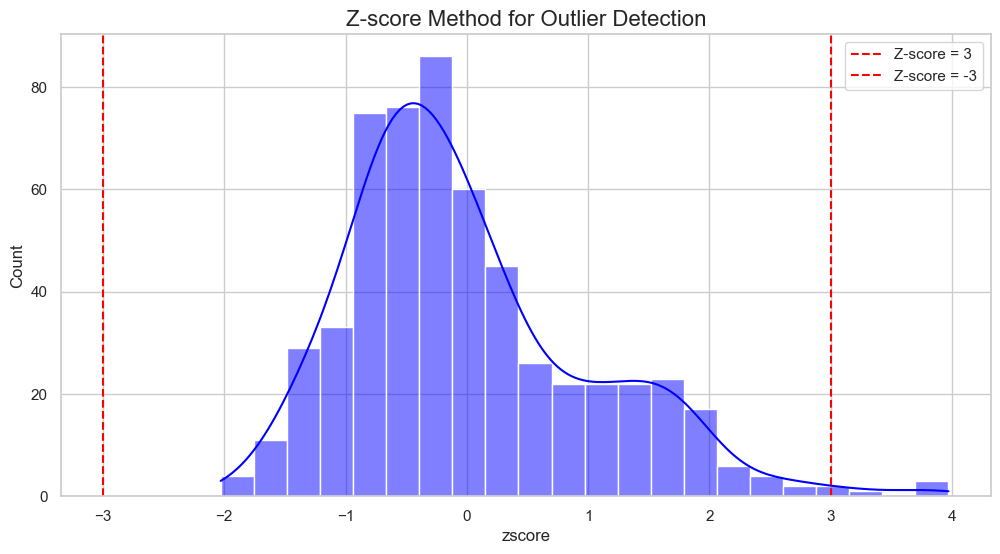

In [2]:
# Set Seaborn style
sns.set(style="whitegrid")

# Loading the dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Univariate Outlier Detection
# 1. Z-score method
df['zscore'] = zscore(df['mean radius'])
outliers_zscore = df[np.abs(df['zscore']) > 3]
print(f'Z-score outliers: {len(outliers_zscore)}')

# Plotting Z-score method
plt.figure(figsize=(12, 6))
sns.histplot(df['zscore'], kde=True, color='blue')
plt.title('Z-score Method for Outlier Detection', fontsize=16)
plt.axvline(3, color='red', linestyle='--', label='Z-score = 3')
plt.axvline(-3, color='red', linestyle='--', label='Z-score = -3')
plt.legend()
plt.show()

IQR outliers: 14


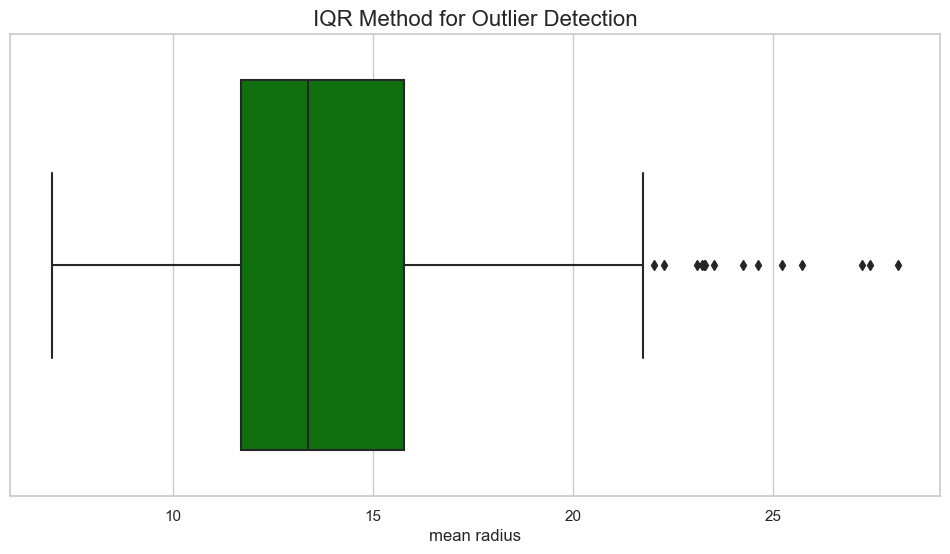

In [3]:
# 2. IQR method
Q1 = df['mean radius'].quantile(0.25)
Q3 = df['mean radius'].quantile(0.75)
IQR = Q3 - Q1
outliers_IQR = df[(df['mean radius'] < (Q1 - 1.5 * IQR)) | (df['mean radius'] > (Q3 + 1.5 * IQR))]
print(f'IQR outliers: {len(outliers_IQR)}')

# Plotting IQR method
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['mean radius'], color='green')
plt.title('IQR Method for Outlier Detection', fontsize=16)
plt.show()

Modified Z-score outliers: 10


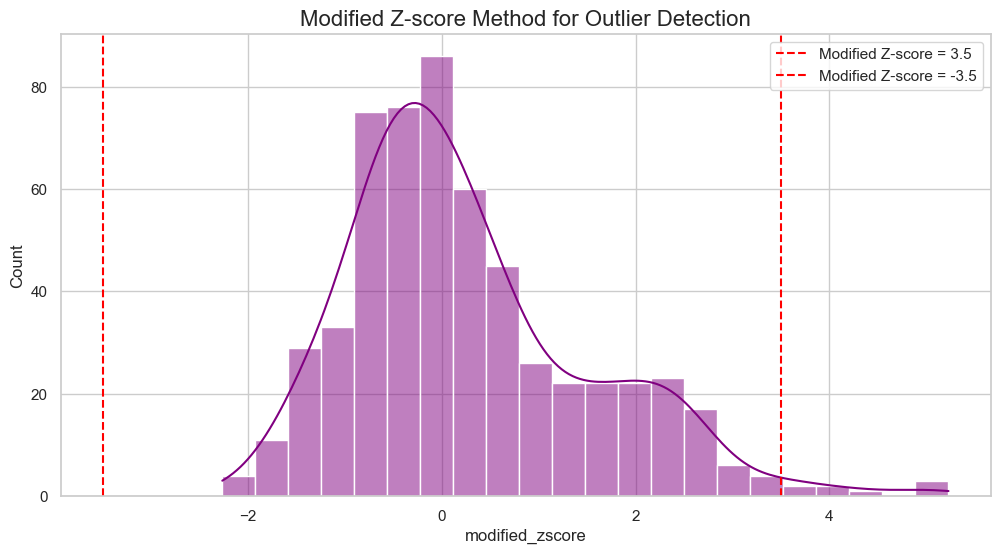

In [4]:
# 3. Modified Z-score method
median = df['mean radius'].median()
MAD = np.median(np.abs(df['mean radius'] - median))
df['modified_zscore'] = 0.6745 * (df['mean radius'] - median) / MAD
outliers_modified_zscore = df[np.abs(df['modified_zscore']) > 3.5]
print(f'Modified Z-score outliers: {len(outliers_modified_zscore)}')

# Plotting Modified Z-score method
plt.figure(figsize=(12, 6))
sns.histplot(df['modified_zscore'], kde=True, color='purple')
plt.title('Modified Z-score Method for Outlier Detection', fontsize=16)
plt.axvline(3.5, color='red', linestyle='--', label='Modified Z-score = 3.5')
plt.axvline(-3.5, color='red', linestyle='--', label='Modified Z-score = -3.5')
plt.legend()
plt.show()

Isolation Forest outliers: 29
LOF outliers: 29


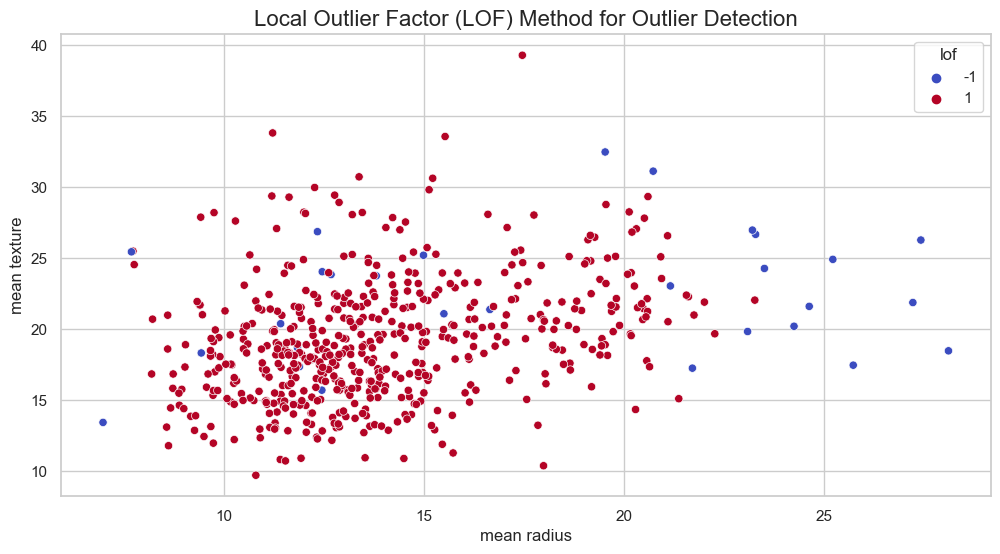

In [5]:
# Multivariate Outlier Detection
# 1. Isolation Forest
iso_forest = IsolationForest(contamination=0.05)
df['iso_forest'] = iso_forest.fit_predict(df[data.feature_names])
outliers_iso_forest = df[df['iso_forest'] == -1]
print(f'Isolation Forest outliers: {len(outliers_iso_forest)}')

# 2. Local Outlier Factor (LOF)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
df['lof'] = lof.fit_predict(df[data.feature_names])
outliers_lof = df[df['lof'] == -1]
print(f'LOF outliers: {len(outliers_lof)}')

# Plotting LOF method
plt.figure(figsize=(12, 6))
sns.scatterplot(x='mean radius', y='mean texture', hue='lof', palette='coolwarm', data=df, legend='full')
plt.title('Local Outlier Factor (LOF) Method for Outlier Detection', fontsize=16)
plt.show()

K-means clustering outliers: 0


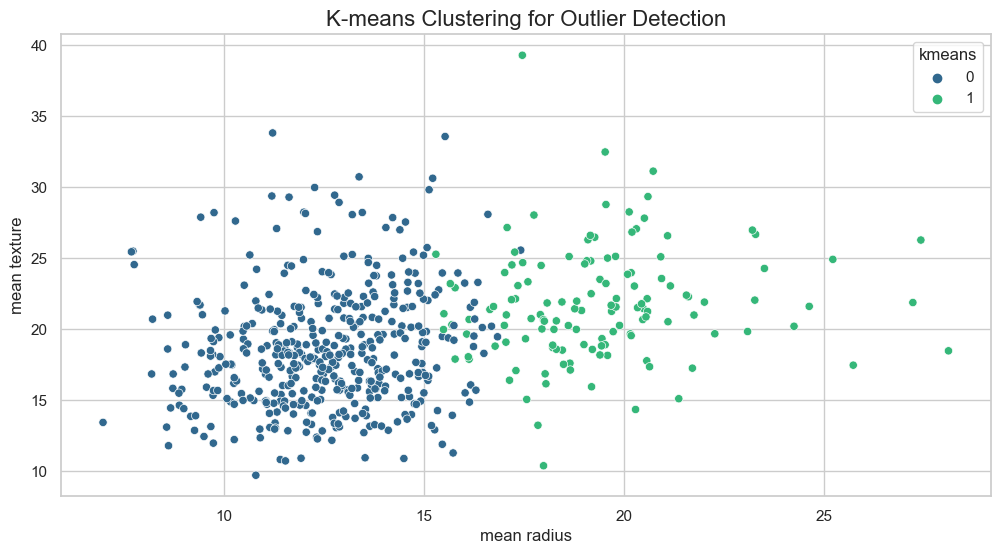

In [6]:
# 3. K-means clustering for outlier detection
kmeans = KMeans(n_clusters=2)
df['kmeans'] = kmeans.fit_predict(df[data.feature_names])
outliers_kmeans = df[df['kmeans'] == -1]
print(f'K-means clustering outliers: {len(outliers_kmeans)}')

# Plotting K-means method
plt.figure(figsize=(12, 6))
sns.scatterplot(x='mean radius', y='mean texture', hue='kmeans', palette='viridis', data=df, legend='full')
plt.title('K-means Clustering for Outlier Detection', fontsize=16)
plt.show()

ABOD outliers: 29


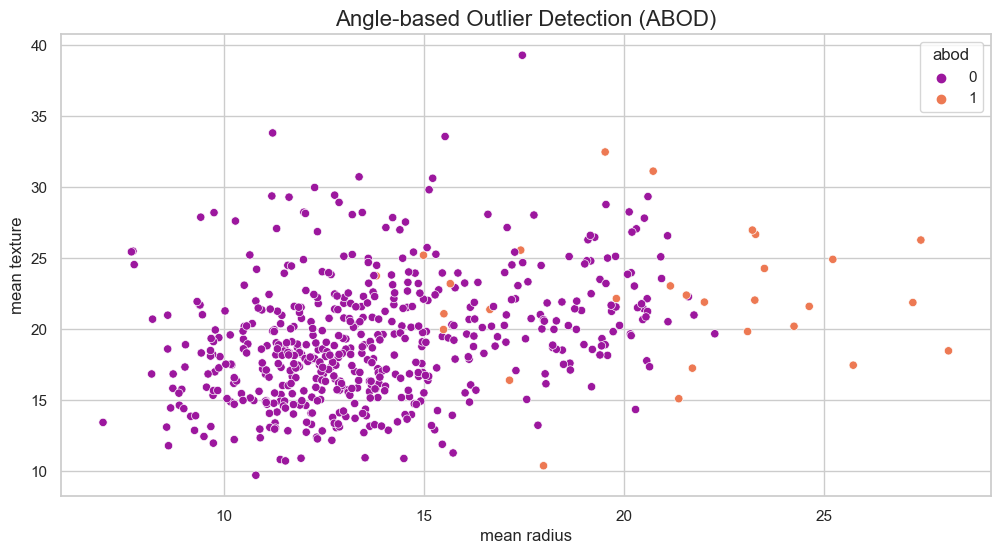

In [7]:
# 4. Angle-based Outlier Detection (ABOD)
abod = ABOD(contamination=0.05)
df['abod'] = abod.fit_predict(df[data.feature_names])
outliers_abod = df[df['abod'] == 1]
print(f'ABOD outliers: {len(outliers_abod)}')

# Plotting ABOD method
plt.figure(figsize=(12, 6))
sns.scatterplot(x='mean radius', y='mean texture', hue='abod', palette='plasma', data=df, legend='full')
plt.title('Angle-based Outlier Detection (ABOD)', fontsize=16)
plt.show()
